# <p style="color:red;">Iris Flower Classification</p>

![](https://i.ytimg.com/vi/r4XNnwjVgW8/sddefault.jpg)

## <p style="color:red;">Introduction:</p>

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that we have the measurements
of Iris flowers categorized by their respective species. 

## <p style="color:red;"> Objective:</p>
Our objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.
We use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

### <p style="color:red;"> Step 1: Import necessary libraries</p>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

### <p style="color:red;"> Step 2: Load the dataset</p>

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)


### <p style="color:red;"> Step 3: Explore the dataset</p>

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
data.isnull().sum() # find null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### <p style="color:red;"> Step 4: Visualize the data</p>

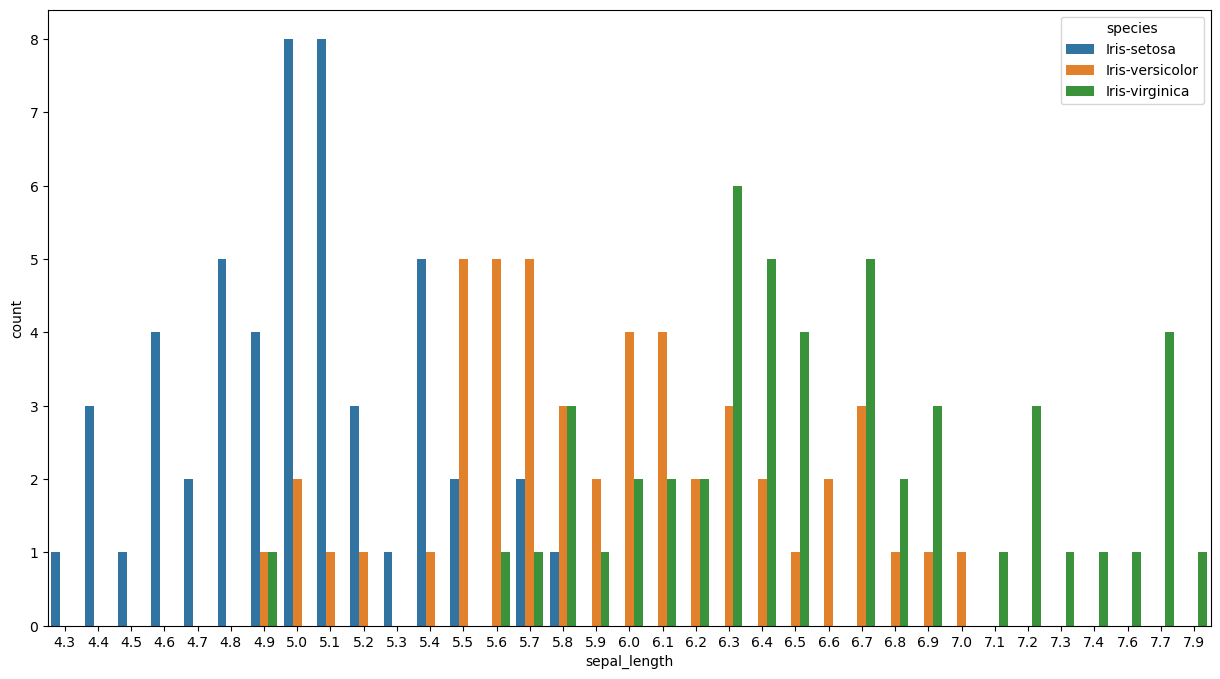

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='sepal_length',data=data,hue='species')
plt.show()

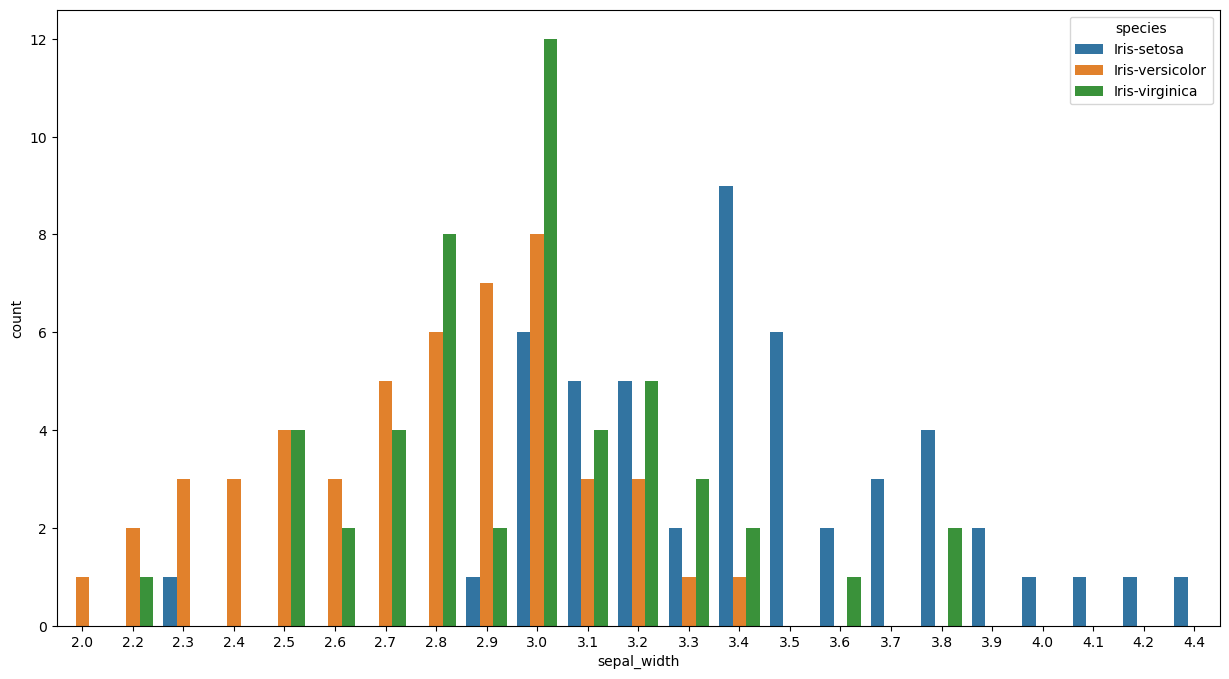

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='sepal_width',data=data,hue='species')
plt.show()

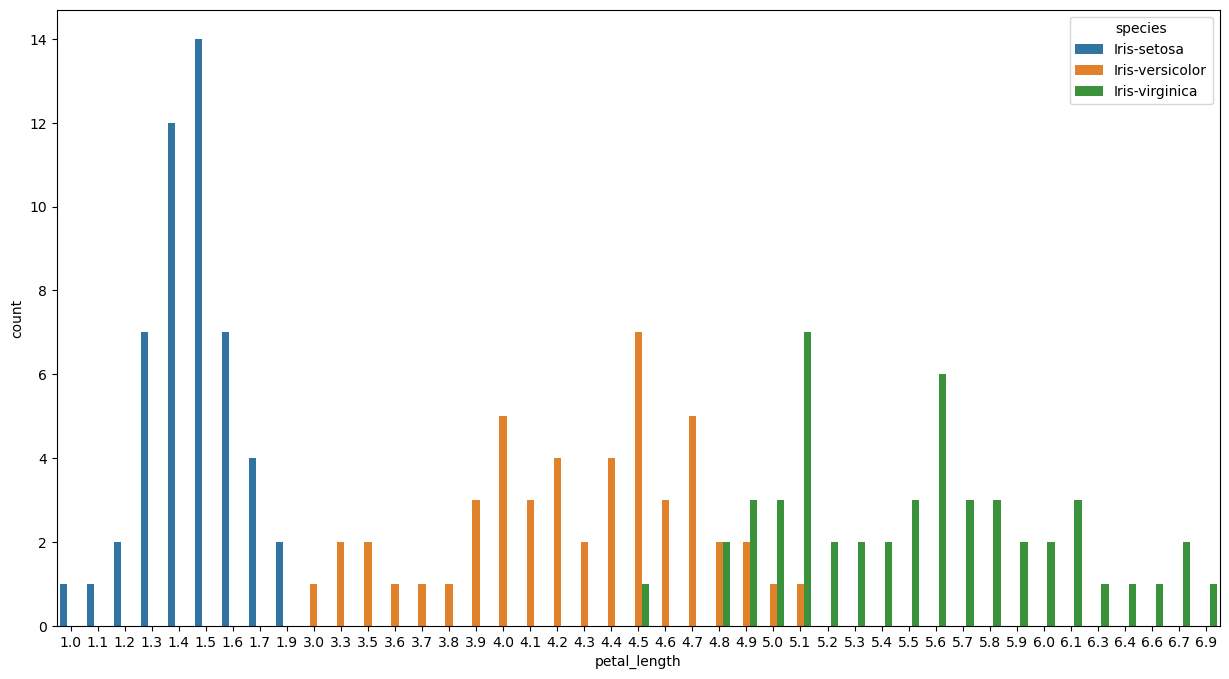

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='petal_length',data=data,hue='species')
plt.show()

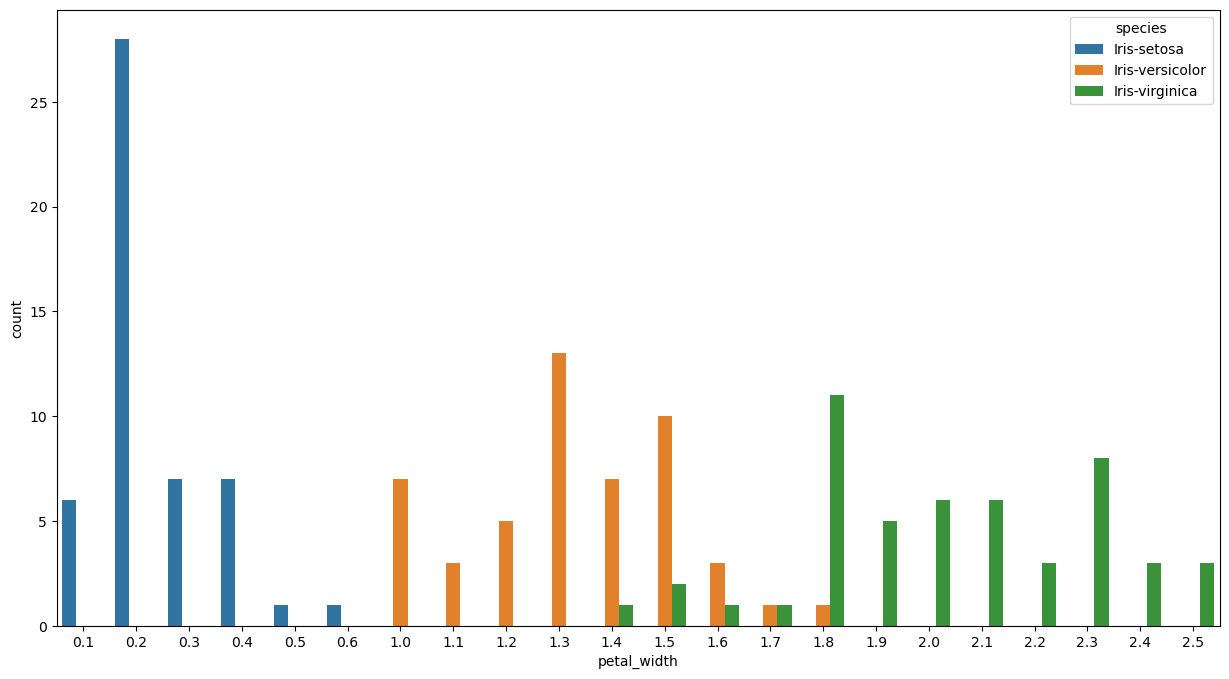

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='petal_width',data=data,hue='species')
plt.show()

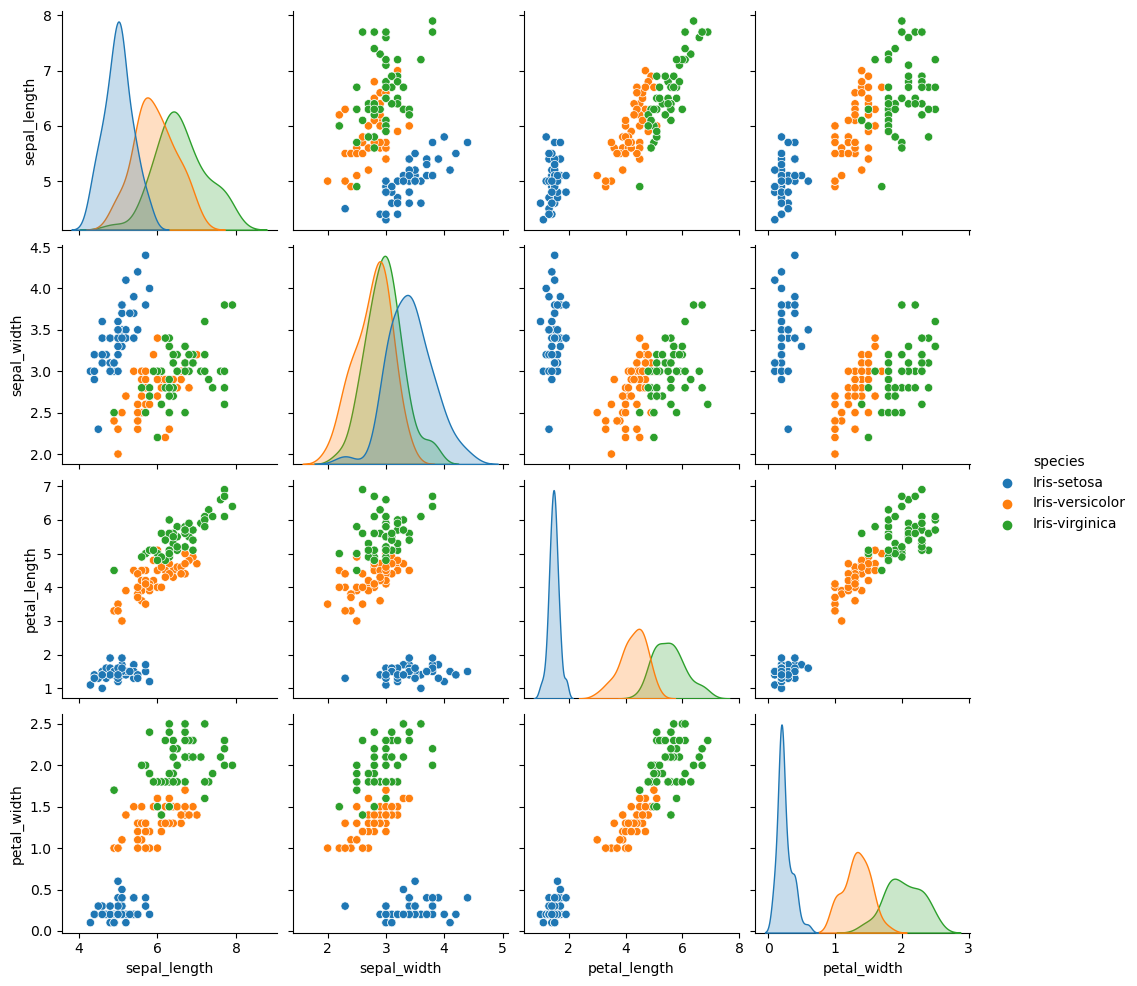

In [14]:
sns.pairplot(data, hue='species')
plt.show()

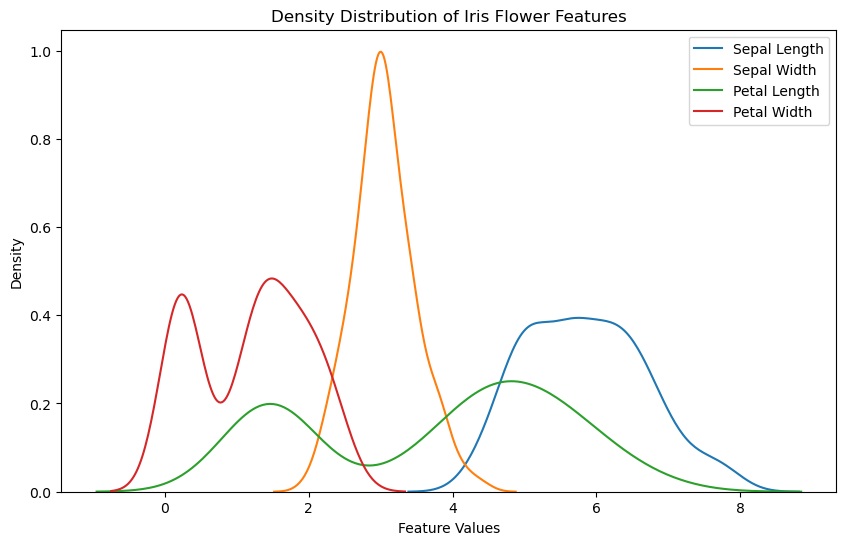

In [15]:
# Density distribution plots for different features
plt.figure(figsize=(10, 6))

sns.distplot(data['sepal_length'], label='Sepal Length', hist=False)
sns.distplot(data['sepal_width'], label='Sepal Width', hist=False)
sns.distplot(data['petal_length'], label='Petal Length', hist=False)
sns.distplot(data['petal_width'], label='Petal Width', hist=False)

plt.legend()
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()

<Figure size 1000x600 with 0 Axes>

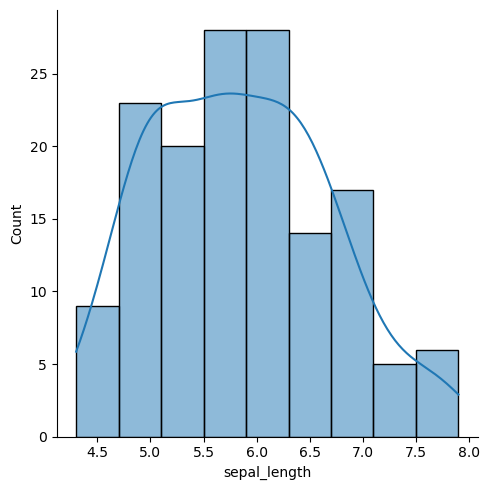

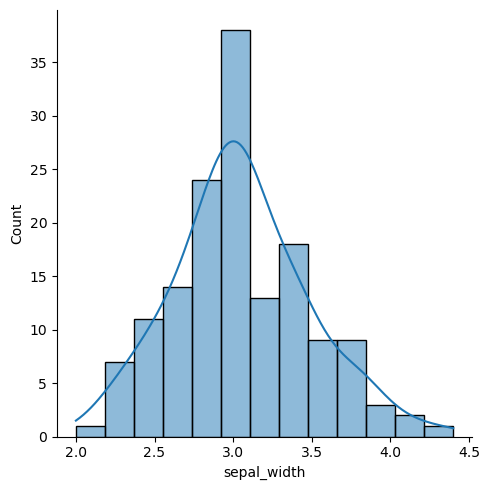

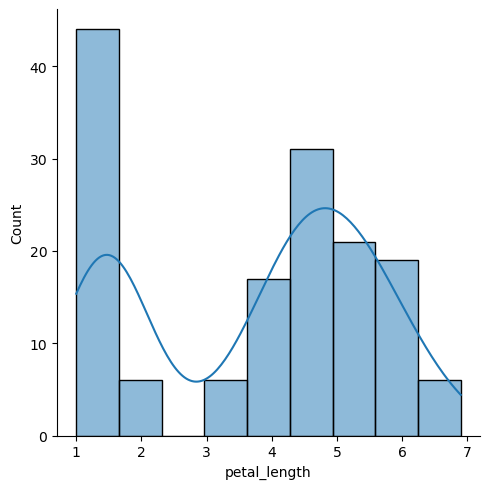

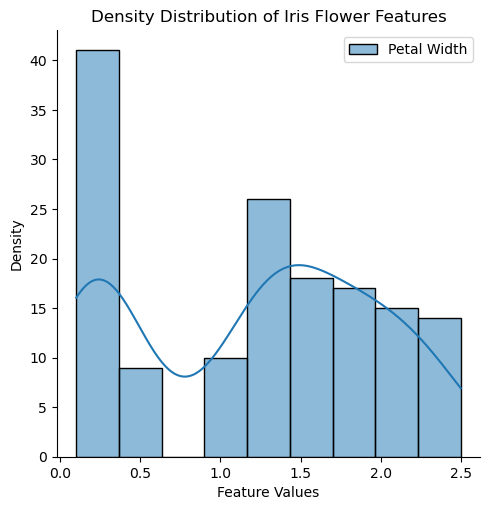

In [16]:
# Density distribution plots for different features
plt.figure(figsize=(10, 6))

sns.displot(data=data, x='sepal_length', label='Sepal Length', kde=True)
sns.displot(data=data, x='sepal_width', label='Sepal Width', kde=True)
sns.displot(data=data, x='petal_length', label='Petal Length', kde=True)
sns.displot(data=data, x='petal_width', label='Petal Width', kde=True)

plt.legend()
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()

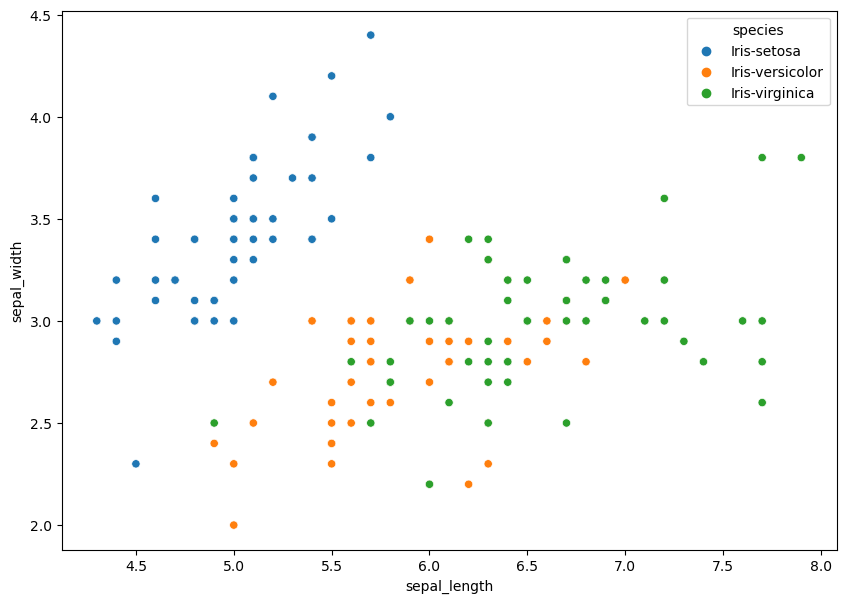

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal_length',y='sepal_width',data=data,hue='species')
plt.show()

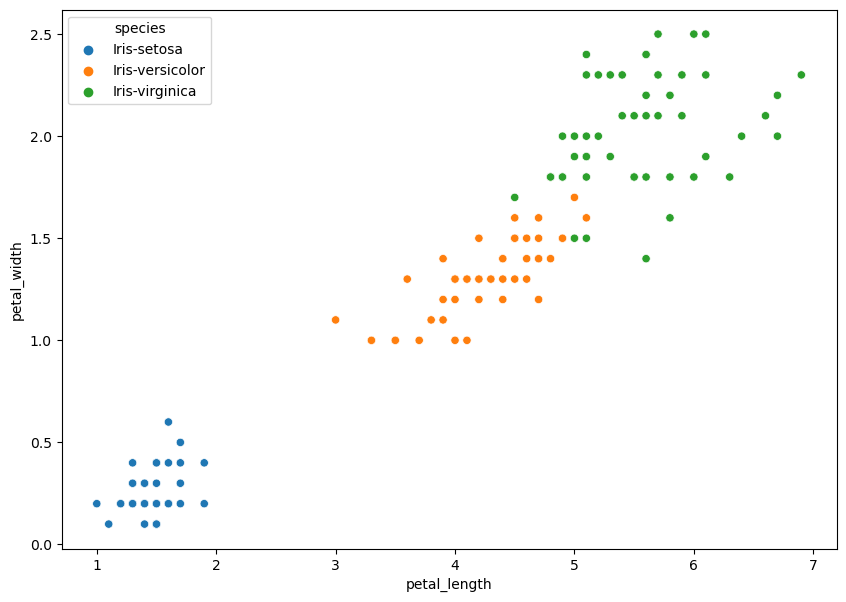

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="petal_length", y="petal_width", data=data, hue="species")
plt.show()

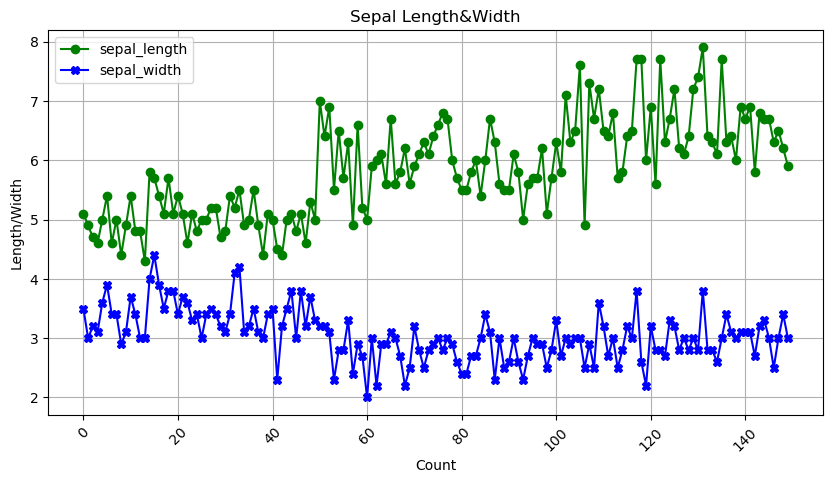

In [19]:
data['sepal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
data['sepal_width'].plot(kind='line',legend=True,marker="X",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width')
plt.xlabel('Count')
plt.ylabel('Length/Width')
plt.show()

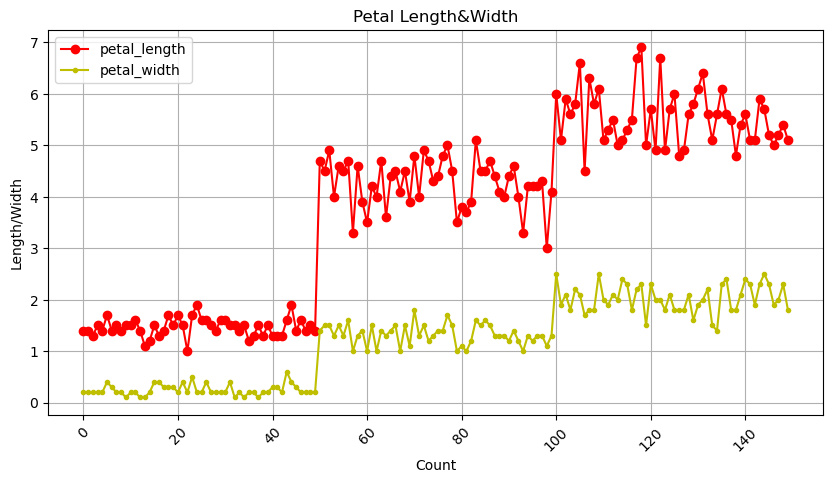

In [20]:
data['petal_length'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
data['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width')
plt.xlabel('Count')
plt.ylabel('Length/Width')
plt.show()

#### <p style="color:red;"> Observation:</p>
+ petal_length and petal_width are most useful feature to separate the various flower types

+ While setosa can be easily separated(linearly separable),virnica and versicolor have some overlap(almost linearly separable)

+ Sepal length is greater then Sepal width

+ Petal length is greater then Petal width


### <p style="color:red;">Step 5: Prepare the data for machine learning</p>

In [21]:
X = data.drop('species', axis=1)
y = data['species']

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


### <p style="color:red;">Step 6: Split the data into training and testing sets</p>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### <p style="color:red;">Step 7: Standardize the features</p>

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### <p style="color:red;">Step 8: Train and Evaluate all models</p>


#### <p style="color:red;"> 1. Logistic Regression model</p>

In [26]:
# Initialize Logistic Regression model
lr = LogisticRegression()

In [27]:
# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Training Accuracy Score
train_accuracy = accuracy_score(y_train, lr.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(lr, X, y, cv=5)
cross_val_score_avg = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy = accuracy_score(y_test, lr.predict(X_test))

# Precision Score
precision = precision_score(y_test, lr.predict(X_test), average='weighted')

# Recall Score
recall = recall_score(y_test, lr.predict(X_test), average='weighted')

# F1-Score Score
f1 = f1_score(y_test, lr.predict(X_test), average='weighted')

# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr.predict(X_test))

# Classification Report
cr = classification_report(y_test, lr.predict(X_test))

In [29]:
# Display the metrics for Logistic Regression
print("Metrics for Logistic Regression:")
print(f"Training Accuracy Score: {train_accuracy}")
print(f"Cross Validation Score: {cross_val_score_avg}")
print(f"Testing Accuracy Score: {test_accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{cm_lr}")
print(f"Classification Report:\n{cr}")

Metrics for Logistic Regression:
Training Accuracy Score: 0.975
Cross Validation Score: 0.9733333333333334
Testing Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1-Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



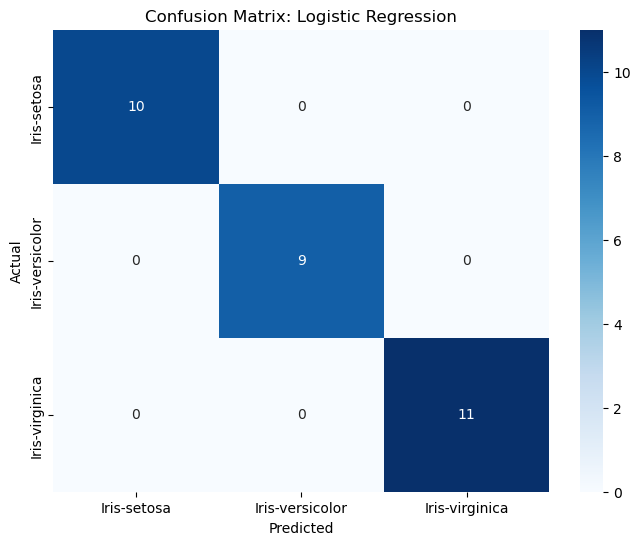

In [30]:
# Confusion Matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.title('Confusion Matrix: Logistic Regression' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### <p style="color:red;"> 2. DecisionTreeClassifier</p>

In [31]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

In [32]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Training Accuracy Score
train_accuracy = accuracy_score(y_train, dt.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(dt, X, y, cv=5)
cross_val_score_avg = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy = accuracy_score(y_test, dt.predict(X_test))

# Precision Score
precision = precision_score(y_test, dt.predict(X_test), average='weighted')

# Recall Score
recall = recall_score(y_test, dt.predict(X_test), average='weighted')

# F1-Score Score
f1 = f1_score(y_test, dt.predict(X_test), average='weighted')

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt.predict(X_test))

# Classification Report
cr = classification_report(y_test, dt.predict(X_test))

In [34]:
# Display the metrics for Decision Tree Classifier
print("Metrics for Decision Tree Classifier:")
print(f"Training Accuracy Score: {train_accuracy}")
print(f"Cross Validation Score: {cross_val_score_avg}")
print(f"Testing Accuracy Score: {test_accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{cm_dt}")
print(f"Classification Report:\n{cr}")

Metrics for Decision Tree Classifier:
Training Accuracy Score: 1.0
Cross Validation Score: 0.9533333333333334
Testing Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1-Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



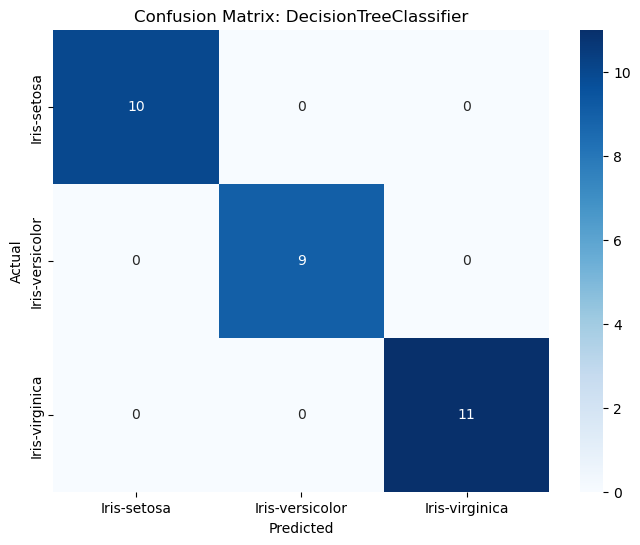

In [35]:
# Confusion Matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.title('Confusion Matrix: DecisionTreeClassifier' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

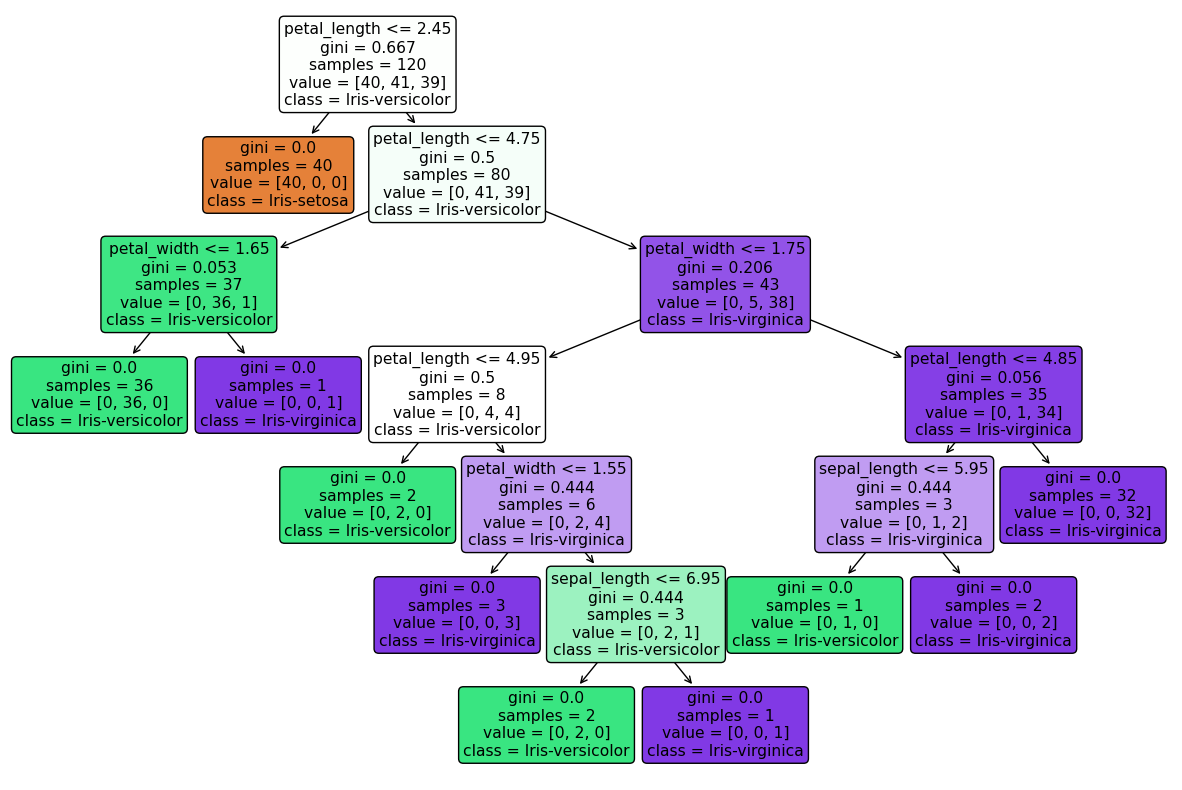

In [36]:
# Visualize the Decision Tree

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=data['species'].unique(), filled=True, rounded=True)
plt.show()


#### <p style="color:red;"> 3. RandomForestClassifier</p>

In [37]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier()

In [38]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Training Accuracy Score
train_accuracy = accuracy_score(y_train, rf.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(rf, X, y, cv=5)
cross_val_score_avg = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

# Precision Score
precision = precision_score(y_test, rf.predict(X_test), average='weighted')

# Recall Score
recall = recall_score(y_test, rf.predict(X_test), average='weighted')

# F1-Score Score
f1 = f1_score(y_test, rf.predict(X_test), average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf.predict(X_test))

# Classification Report
cr = classification_report(y_test, rf.predict(X_test))

In [40]:
# Display the metrics for RandomForestClassifier
print("Metrics for RandomForestClassifier:")
print(f"Training Accuracy Score: {train_accuracy}")
print(f"Cross Validation Score: {cross_val_score_avg}")
print(f"Testing Accuracy Score: {test_accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Classification Report:\n{cr}")

Metrics for RandomForestClassifier:
Training Accuracy Score: 1.0
Cross Validation Score: 0.96
Testing Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1-Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



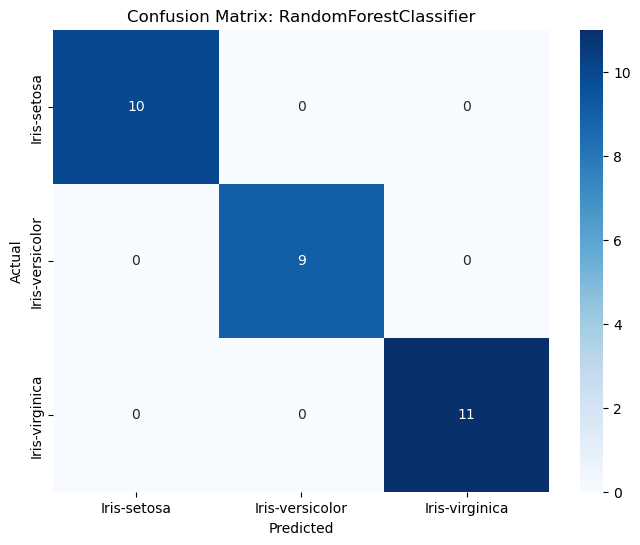

In [41]:
# Confusion Matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.title('Confusion Matrix: RandomForestClassifier' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### <p style="color:red;"> 4. KNeighborsClassifier</p>

In [42]:
# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
# Training Accuracy Score
train_accuracy = accuracy_score(y_train, knn.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(knn, X, y, cv=5)
cross_val_score_avg = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy = accuracy_score(y_test, knn.predict(X_test))

# Precision Score
precision = precision_score(y_test, knn.predict(X_test), average='weighted')

# Recall Score
recall = recall_score(y_test, knn.predict(X_test), average='weighted')

# F1-Score Score
f1 = f1_score(y_test, knn.predict(X_test), average='weighted')

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn.predict(X_test))

# Classification Report
cr = classification_report(y_test, knn.predict(X_test))

In [45]:
# Display the metrics for KNeighborsClassifier
print("Metrics for KNeighborsClassifier:")
print(f"Training Accuracy Score: {train_accuracy}")
print(f"Cross Validation Score: {cross_val_score_avg}")
print(f"Testing Accuracy Score: {test_accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{cr}")

Metrics for KNeighborsClassifier:
Training Accuracy Score: 0.9666666666666667
Cross Validation Score: 0.9733333333333334
Testing Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1-Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



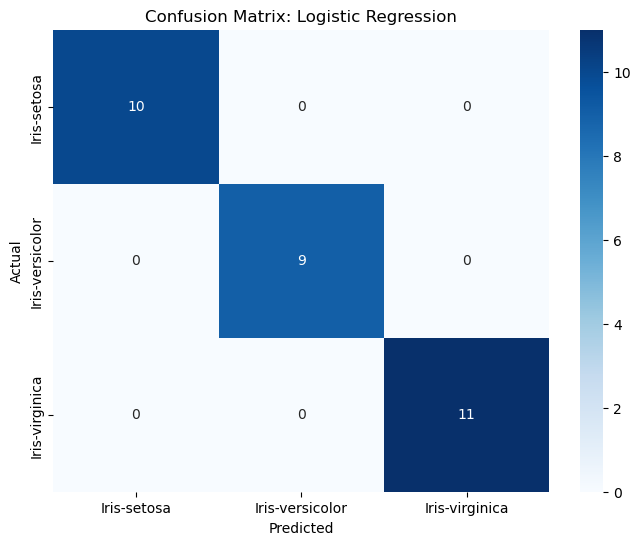

In [46]:
# Confusion Matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.title('Confusion Matrix: Logistic Regression' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### <p style="color:red;">Comparing Models Accuracy </p>

In [47]:
key= ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
value=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'KNeighborsClassifier': KNeighborsClassifier()}


In [48]:
predicted=[]
for name,algo in models.items():
    model=algo
    scores=cross_val_score(model,X,y,cv=5)
    average_acc=np.average(scores)
    print(name,average_acc)
    predicted.append(average_acc)

LogisticRegression 0.9733333333333334
DecisionTreeClassifier 0.9600000000000002
RandomForestClassifier 0.96
KNeighborsClassifier 0.9733333333333334


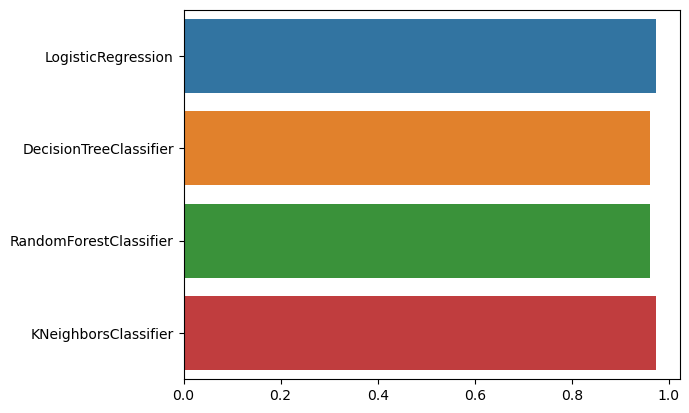

In [49]:
sns.barplot(x=predicted,y=key)
plt.show()

### <p style="color:red;">Conclusion :</p>
+ All models achieved perfect training accuracy, indicating they learned the training data well.
+ Cross-validation scores and testing accuracy scores are high, suggesting good generalization to new data.
+ Precision, recall, and F1-Score are all perfect, indicating a well-balanced model.
+ Logistic Regression and KNeighbors Classifier showing Highest accuracy